In [1]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
NUM_FEATURES = 2
NUM_ITER = 2000
learning_rate = 0.01

In [ ]:
x = np.array([[0, 0], [1, 0], [1, 1], [0, 1]], np.float32) # 4x2, input
y = np.array([0, 0, 1, 0], np.float32) # 4, correct output, AND operation
#y = np.array([0, 1, 1, 1], np.float32) # OR operation
#y = np.array([0, 1, 0, 1], np.float32) # OR operation 
W = np.zeros(NUM_FEATURES, np.float32) # 2x1, weight
b = np.zeros(1, np.float32) # 1x1
 
N, d = np.shape(x) # number of samples and number of features
print(N,d)

# process each sample separately
for k in range(NUM_ITER):
   for j in range(N):
     #print(x[j, :])
     
     yHat_j = x[j, :].dot(W)  # 1x2, 2x1
     #print(yHat_j) 
     if yHat_j>= 1.0:
        yHat_j=1.0
     else:
        yHat_j=0.0
     #yHat_j = 1.0 / (1.0 + np.exp(-yHat_j))
     #print(yHat_j) 
     
     err = y[j] - yHat_j # error term
     #print(err)   
     deltaW = err * x[j, :]
     #deltaB = err
     W = W + learning_rate * deltaW # if err = y - yHat, then W = W + lRate * deltW
     #b = b + learning_rate * deltaB

# Now plot the fitted line. We need only two points to plot the line
plot_x = np.array([np.min(x[:, 0] - 0.2), np.max(x[:, 1]+0.2)])
plot_y = - 1 / W[1] * (W[0] * plot_x-1) # comes from, w0*x + w1*y + 0.5 = 0 then y = (-1/w1) (w0*x + b)
 
print('W:' + str(W))
print('b:' + str(b))
print(x[:, 0])
print(x[:, 1])
print('plot_y: '+ str(plot_y))
plt.scatter(x[:, 0], x[:, 1], c=y, s=100, cmap='viridis')
plt.plot(plot_x, plot_y, color='k', linewidth=2)
plt.xlim([-0.2, 1.2]); plt.ylim([-0.2, 1.25]);
plt.show()
for j in range(N):
     
     
     yHat_j = x[j, :].dot(W)  # 1x2, 2x1
     if yHat_j>=1.0:
        print('1')
     else:
        print('0')

W: [2.6895783 2.6895783]
b: -4.26431
[0. 1. 1. 0.]
[0. 0. 1. 1.]
plot_y: [1.7854939  0.38549384]


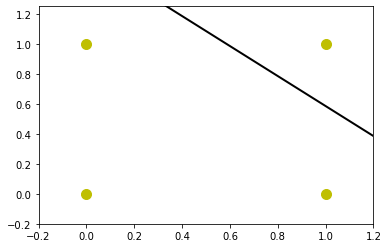

In [5]:
import numpy as np
#b=1.0
x = np.array([[0, 0], [1, 0], [1, 1], [0, 1]], np.float32) # 4x2, input
#y = np.array([0, 0, 1, 0], np.float32) # 4, correct output, AND operation
y = np.array([0, 1, 1, 1], np.float32) # OR operation
y = np.reshape(y, [4,1]) # convert to 4x1
 
X = tf.placeholder(tf.float32, shape=[4, 2])
Y = tf.placeholder(tf.float32, shape=[4, 1])
 
W = tf.Variable(tf.zeros([NUM_FEATURES, 1]), tf.float32)
B = tf.Variable(tf.zeros([1, 1]), tf.float32)
 
yHat = tf.sigmoid( tf.add(tf.matmul(X, W), B) ) # 4x1
#yHat = tf.add(tf.matmul(X, W), B) 
err = Y - yHat
deltaW = tf.matmul(tf.transpose(X), err ) # have to be 2x1
deltaB = tf.reduce_sum(err, 0) # 4, have to 1x1. sum all the biases? yes
W_ = W + learning_rate * deltaW
B_ = B + learning_rate * deltaB
 
step = tf.group(W.assign(W_), B.assign(B_)) #to update the values of weights and biases.
 
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
 
for k in range(NUM_ITER):
 sess.run([step], feed_dict={X: x, Y: y})
 
W = np.squeeze(sess.run(W))
b = np.squeeze(sess.run(B))
# Now plot the fitted line. We need only two points to plot the line
plot_x = np.array([np.min(x[:, 0] - 0.2), np.max(x[:, 1]+0.2)])
plot_y = - 1 / W[1] * (W[0] * plot_x + b)
plot_y = np.reshape(plot_y, [2, -1])
plot_y = np.squeeze(plot_y)
 
print('W: ' + str(W))
print('b: ' + str(b))
print(x[:, 0])
print(x[:, 1])
print('plot_y: '+ str(plot_y))
 
plt.scatter(x[:, 0], x[:, 1], c='y', s=100, cmap='viridis')
plt.plot(plot_x, plot_y, color='k', linewidth=2)
plt.xlim([-0.2, 1.2]); plt.ylim([-0.2, 1.25]);
plt.show()

In [ ]:
print(sess.run(result))

In [ ]:
!git clone -b 1.2.0-cp27 https://github.com/Jpub/TensorflowDeeplearning